In [1]:
from qiskit.circuit import classical_function,  Int1
@classical_function
def grover_oracle(a1: Int1, a2: Int1, a3: Int1, a4: Int1, a5: Int1, a6: Int1, a7: Int1, a8: Int1, a9:Int1, a10: Int1, a11: Int1, a12:Int1) -> Int1: 
    return ((a10&a8 ^ a11&a7)&(a1&a6 ^ a3&a4)&(a1&a11 ^ a1&a12 ^ a1&a5 ^ a1&a6 ^ a10&a2 ^ a10&a3 ^ a10&a8 ^ a10&a9 ^ a11&a7 ^ a12&a7 ^ a2&a4 ^ a3&a4 ^ a4&a8 ^ a4&a9 ^ a5&a7 ^ a6&a7)&((not a10) ^ a12 ^ a8 ^ a10&a8 ^ a11&a7 ^ a11&a9 ^ a12&a8)&((not a1) ^ a2 ^ a6 ^ a1&a6 ^ a2&a6 ^ a3&a4 ^ a3&a5)&((not a1) ^ a10 ^ a12 ^ a2 ^ a4 ^ a6 ^ a7 ^ a8 ^ a1&a11 ^ a1&a12 ^ a1&a5 ^ a1&a6 ^ a10&a2 ^ a10&a3 ^ a10&a8 ^ a10&a9 ^ a11&a3 ^ a11&a7 ^ a11&a9 ^ a12&a2 ^ a12&a7 ^ a12&a8 ^ a2&a4 ^ a2&a6 ^ a3&a4 ^ a3&a5 ^ a4&a8 ^ a4&a9 ^ a5&a7 ^ a5&a9 ^ a6&a7 ^ a6&a8))
quantum_circuitnc = grover_oracle.synth() 
quantum_circuitnc.draw()

q_0: ──o────■────o────o────o────■────■────■────■────■────■────■────■──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_1: ──o────o────o────■────■────o────o────o────o────o────o────■────■──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_2: ──■────■────■────■────■────■────■────■────■────■────■────■────■──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_3: ──■────■────■────■────■────■────■────■────■────■────┼────o────■──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_4: ──o────■────■────o────o────■────■────■────┼────■────■────■────■──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_5: ──■────■────o────o────■────■────■────┼────o────■────■────■────o──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_6: ──■────o────■────■────■────o────┼────■────■────o────o────o────■──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_7: ──o────■────■────o────o────┼────o────o────o────■────■────■────■──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_8: ──■────■────o────o────■────o────o────o────o────┼────■────■────o──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
 q_9: ──■────┼────o────■────o────o────o────o────o────o────■────■────o──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
q_10: ──■────■────■────■────■────■────■────■────■────■────■────■────■──
        │    │    │    │    │    │    │    │    │    │    │    │    │  
q_11: ──■────■────■────o────o────■────■────■────■────■────■────o────o──
      ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_12: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
      └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [2]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U_s"
    return U_s


In [3]:
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble 
import random

qreg11 = QuantumRegister(13)
creg11 = ClassicalRegister(12)
qc11 = QuantumCircuit(qreg11,creg11)


# Initialize qubits in state |s>
qc11.x(12)
qc11.h(range(13))
qc11.barrier()  
test_list = []
for j in range(63):
    test_list.append(j) 
# using random.choice() to
# get a random number
random_num = random.choice(test_list)
print(random_num)
for j in range(random_num):
    qc11.compose(quantum_circuitnc, inplace = True)
    qc11.append(diffuser(12), range(12))
    
qc11.barrier() 

qc11.h(12)


# Measure the variable qubits
qc11.measure(range(12), range(12))

qc11.draw(fold=-1)



62


┌───┐      ░                                                                  ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 ┌───────┐                                                                 

{'111110000001': 1, '010100001011': 1, '101111000000': 1, '101001011001': 1, '111010011001': 1, '110110100100': 1, '111101000101': 1, '001001000001': 3, '011001001110': 66, '100100100000': 1, '010000100001': 1, '100011100100': 1, '111000101101': 1, '001001001010': 1, '110011010101': 1, '111101010011': 1, '101010011000': 1, '000011100111': 1, '101100010001': 1, '010011110010': 1, '110111101100': 1, '100101010010': 1, '110011011100': 71, '010011001010': 1, '111110110101': 59, '000111001111': 1, '011110110111': 57, '001000111101': 1, '010010111110': 1, '110001001101': 47, '111100110001': 1, '101010101000': 1, '001001100110': 1, '110010101111': 1, '011011111011': 1, '101000011000': 1, '111001001100': 1, '001110101111': 1, '100101110011': 1, '101011010010': 1, '010100011001': 1, '100011001111': 1, '101111011001': 1, '011011100001': 1, '110110001101': 1, '111111010010': 1, '000011011111': 1, '010101101110': 55, '011010110001': 1, '001010011101': 1, '001010000111': 1, '010000110000': 1, '1101

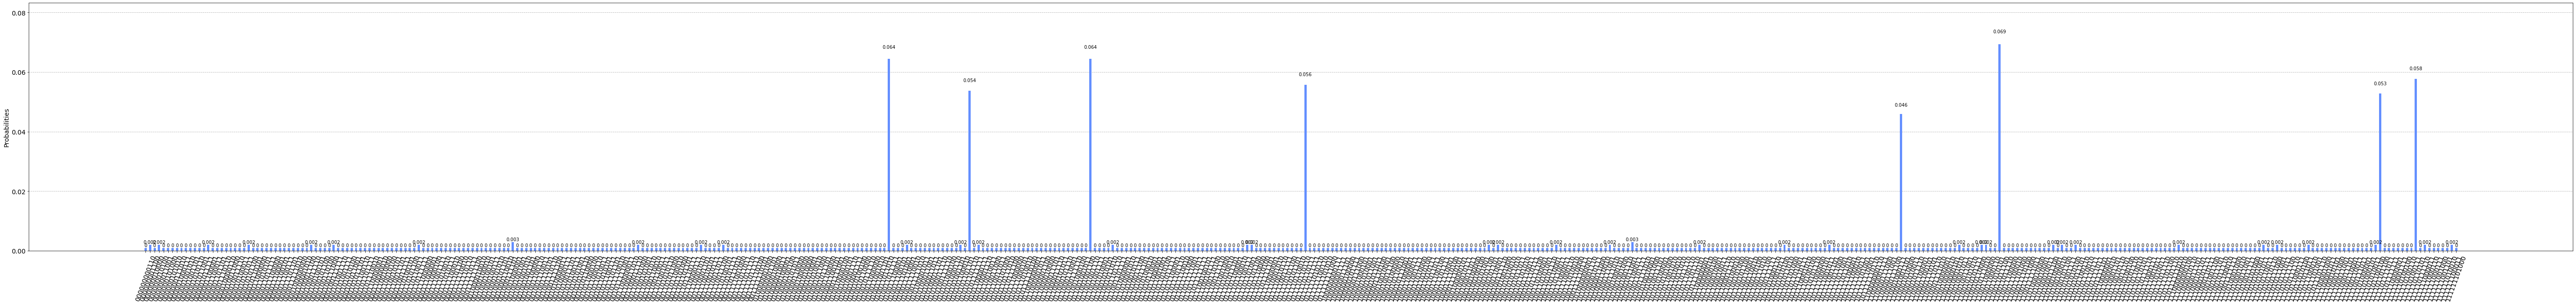

In [4]:
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')
transpiled_qc11 = transpile(qc11, aer_sim)
qobj = assemble(transpiled_qc11)
results = aer_sim.run(qobj,shots =1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts, figsize=(100,10))

As it is notice we found eight solutions:

'110011011100', '111101101100', '110001001101', '011110110111', '010011011111', '111110110101',  '010101101110',  '011001001110'

Now we remove them from the oracle as follows: 

Let us take for example '010101101110', this solution must be read from right to left, i.e., 
$$a_1=0,a_2=1,a_3=1,a_4=1,a_5=0,a_6=1,a_7=1,a_8=0,a_9=1,a_{10}=0,a_{11}=1,a_{12}=0$$

And it can be seen as:

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble 


qreg13 = QuantumRegister(13)
ancillary13 = QuantumRegister(16)

qc13 = QuantumCircuit(qreg13,ancillary13)

qc13.barrier()
qc13.x(qreg13[0])
qc13.cx(qreg13[0],ancillary13[0])
qc13.x(qreg13[0])
qc13.barrier()
qc13.ccx(qreg13[1],ancillary13[0],ancillary13[1])
qc13.ccx(qreg13[2],ancillary13[1],ancillary13[2])
qc13.ccx(qreg13[3],ancillary13[2],ancillary13[3])
qc13.barrier()
qc13.x(qreg13[4])
qc13.cx(qreg13[4],ancillary13[4])
qc13.x(qreg13[4])
qc13.barrier()
qc13.ccx(ancillary13[3],ancillary13[4],ancillary13[5])
qc13.ccx(qreg13[5],ancillary13[5],ancillary13[6])
qc13.ccx(qreg13[6],ancillary13[6],ancillary13[7])
qc13.barrier()
qc13.x(qreg13[7])
qc13.cx(qreg13[7],ancillary13[8])
qc13.x(qreg13[7])
qc13.barrier()
qc13.ccx(ancillary13[7],ancillary13[8],ancillary13[9])
qc13.ccx(qreg13[8],ancillary13[9],ancillary13[10])
qc13.barrier()
qc13.x(qreg13[9])
qc13.cx(qreg13[9],ancillary13[11])
qc13.x(qreg13[9])
qc13.barrier()
qc13.ccx(ancillary13[10],ancillary13[11],ancillary13[12])
qc13.ccx(qreg13[10],ancillary13[12],ancillary13[13])
qc13.barrier()
qc13.x(qreg13[11])
qc13.cx(qreg13[11],ancillary13[14])
qc13.x(qreg13[11])
qc13.barrier()
qc13.ccx(ancillary13[13],ancillary13[14],ancillary13[15])
qc13.cx(ancillary13[15],qreg13[12])
qc13.barrier()
qc13.ccx(ancillary13[13],ancillary13[14],ancillary13[15])
qc13.barrier()
qc13.x(qreg13[11])
qc13.cx(qreg13[11],ancillary13[14])
qc13.x(qreg13[11])
qc13.barrier()
qc13.ccx(qreg13[10],ancillary13[12],ancillary13[13])
qc13.ccx(ancillary13[10],ancillary13[11],ancillary13[12])
qc13.barrier()
qc13.x(qreg13[9])
qc13.cx(qreg13[9],ancillary13[11])
qc13.x(qreg13[9])
qc13.barrier()
qc13.ccx(qreg13[8],ancillary13[9],ancillary13[10])
qc13.ccx(ancillary13[7],ancillary13[8],ancillary13[9])
qc13.barrier()
qc13.x(qreg13[7])
qc13.cx(qreg13[7],ancillary13[8])
qc13.x(qreg13[7])
qc13.barrier()
qc13.ccx(qreg13[6],ancillary13[6],ancillary13[7])
qc13.ccx(qreg13[5],ancillary13[5],ancillary13[6])
qc13.ccx(ancillary13[3],ancillary13[4],ancillary13[5])
qc13.barrier()
qc13.x(qreg13[4])
qc13.cx(qreg13[4],ancillary13[4])
qc13.x(qreg13[4])
qc13.barrier()
qc13.ccx(qreg13[3],ancillary13[2],ancillary13[3])
qc13.ccx(qreg13[2],ancillary13[1],ancillary13[2])
qc13.ccx(qreg13[1],ancillary13[0],ancillary13[1])
qc13.barrier()
qc13.x(qreg13[0])
qc13.cx(qreg13[0],ancillary13[0])
qc13.x(qreg13[0])
qc13.barrier()
qc13.draw()
    

░ ┌───┐     ┌───┐ ░                 ░                 ░           »
 q40_0: ─░─┤ X ├──■──┤ X ├─░─────────────────░─────────────────░───────────»
         ░ └───┘  │  └───┘ ░                 ░                 ░           »
 q40_1: ─░────────┼────────░───■─────────────░─────────────────░───────────»
         ░        │        ░   │             ░                 ░           »
 q40_2: ─░────────┼────────░───┼────■────────░─────────────────░───────────»
         ░        │        ░   │    │        ░                 ░           »
 q40_3: ─░────────┼────────░───┼────┼────■───░─────────────────░───────────»
         ░        │        ░   │    │    │   ░ ┌───┐     ┌───┐ ░           »
 q40_4: ─░────────┼────────░───┼────┼────┼───░─┤ X ├──■──┤ X ├─░───────────»
         ░        │        ░   │    │    │   ░ └───┘  │  └───┘ ░           »
 q40_5: ─░────────┼────────░───┼────┼────┼───░────────┼────────░────────■──»
         ░        │        ░   │    │    │   ░        │        ░        │  »
 q40_6: ─░────────┼────────░───┼────┼────┼───░────────┼────────░────────┼──»
         ░        │        ░   │    │    │   ░        │        ░        │  »
 q40_7: ─░────────┼────────░───┼────┼────┼───░────────┼────────░────────┼──»
         ░        │        ░   │    │    │   ░        │        ░        │  »
 q40_8: ─░────────┼────────░───┼────┼────┼───░────────┼────────░────────┼──»
         ░        │        ░   │    │    │   ░        │        ░        │  »
 q40_9: ─░────────┼────────░───┼────┼────┼───░────────┼────────░────────┼──»
         ░        │        ░   │    │    │   ░        │        ░        │  »
q40_10: ─░────────┼────────░───┼────┼────┼───░────────┼────────░────────┼──»
         ░        │        ░   │    │    │   ░        │        ░        │  »
q40_11: ─░────────┼────────░───┼────┼────┼───░────────┼────────░────────┼──»
         ░        │        ░   │    │    │   ░        │        ░        │  »
q40_12: ─░────────┼────────░───┼────┼────┼───░────────┼────────░────────┼──»
         ░      ┌─┴─┐      ░   │    │    │   ░        │        ░        │  »
 q41_0: ─░──────┤ X ├──────░───■────┼────┼───░────────┼────────░────────┼──»
         ░      └───┘      ░ ┌─┴─┐  │    │   ░        │        ░        │  »
 q41_1: ─░─────────────────░─┤ X ├──■────┼───░────────┼────────░────────┼──»
         ░                 ░ └───┘┌─┴─┐  │   ░        │        ░        │  »
 q41_2: ─░─────────────────░──────┤ X ├──■───░────────┼────────░────────┼──»
         ░                 ░      └───┘┌─┴─┐ ░        │        ░        │  »
 q41_3: ─░─────────────────░───────────┤ X ├─░────────┼────────░───■────┼──»
         ░                 ░           └───┘ ░      ┌─┴─┐      ░   │    │  »
 q41_4: ─░─────────────────░─────────────────░──────┤ X ├──────░───■────┼──»
         ░                 ░                 ░      └───┘      ░ ┌─┴─┐  │  »
 q41_5: ─░─────────────────░─────────────────░─────────────────░─┤ X ├──■──»
         ░                 ░                 ░                 ░ └───┘┌─┴─┐»
 q41_6: ─░─────────────────░─────────────────░─────────────────░──────┤ X ├»
         ░                 ░                 ░                 ░      └───┘»
 q41_7: ─░─────────────────░─────────────────░─────────────────░───────────»
         ░                 ░                 ░                 ░           »
 q41_8: ─░─────────────────░─────────────────░─────────────────░───────────»
         ░                 ░                 ░                 ░           »
 q41_9: ─░─────────────────░─────────────────░─────────────────░───────────»
         ░                 ░                 ░                 ░           »
q41_10: ─░─────────────────░─────────────────░─────────────────░───────────»
         ░                 ░                 ░                 ░           »
q41_11: ─░─────────────────░─────────────────░─────────────────░───────────»
         ░                 ░                 ░                 ░           »
q41_12: ─░─────────────────░─────────────────░─────────────────░───────────»
     

In [25]:
creg13 = ClassicalRegister(13)
creg14 = ClassicalRegister(16)
for i in range(0,4096): 
    print("****",'{0:12b}'.format(i),i)
    q13 = QuantumCircuit(qreg13, ancillary13, creg13, creg14)
    s='{0:12b}'.format(i)
    for j in range(len(s)):
        if(s[j]=="1"):
            q13.x(j)
    q13.compose(qc13, inplace = True)
    for i in range(13):
        q13.measure(qreg13[i],creg13[i])
    for i in range(6):
        q13.measure(ancillary13[i],creg14[i])
    q13.draw()
    transpiled_q13 = transpile(q13, aer_sim)
    qobjq13 = assemble(transpiled_q13)
    resultsq13 = aer_sim.run(qobjq13,shots =1024).result()
    countsq13 = resultsq13.get_counts()
    print(countsq13)  

****            0 0
{'0000000000000000 0000000000000': 1024}
****            1 1
{'0000000000000000 0100000000000': 1024}
****           10 2
{'0000000000000000 0010000000000': 1024}
****           11 3
{'0000000000000000 0110000000000': 1024}
****          100 4
{'0000000000000000 0001000000000': 1024}
****          101 5
{'0000000000000000 0101000000000': 1024}
****          110 6
{'0000000000000000 0011000000000': 1024}
****          111 7
{'0000000000000000 0111000000000': 1024}
****         1000 8
{'0000000000000000 0000100000000': 1024}
****         1001 9
{'0000000000000000 0100100000000': 1024}
****         1010 10
{'0000000000000000 0010100000000': 1024}
****         1011 11
{'0000000000000000 0110100000000': 1024}
****         1100 12
{'0000000000000000 0001100000000': 1024}
****         1101 13
{'0000000000000000 0101100000000': 1024}
****         1110 14
{'0000000000000000 0011100000000': 1024}
****         1111 15
{'0000000000000000 0111100000000': 1024}
****        10000 

{'0000000000000000 0101000010000': 1024}
****     10000110 134
{'0000000000000000 0011000010000': 1024}
****     10000111 135
{'0000000000000000 0111000010000': 1024}
****     10001000 136
{'0000000000000000 0000100010000': 1024}
****     10001001 137
{'0000000000000000 0100100010000': 1024}
****     10001010 138
{'0000000000000000 0010100010000': 1024}
****     10001011 139
{'0000000000000000 0110100010000': 1024}
****     10001100 140
{'0000000000000000 0001100010000': 1024}
****     10001101 141
{'0000000000000000 0101100010000': 1024}
****     10001110 142
{'0000000000000000 0011100010000': 1024}
****     10001111 143
{'0000000000000000 0111100010000': 1024}
****     10010000 144
{'0000000000000000 0000010010000': 1024}
****     10010001 145
{'0000000000000000 0100010010000': 1024}
****     10010010 146
{'0000000000000000 0010010010000': 1024}
****     10010011 147
{'0000000000000000 0110010010000': 1024}
****     10010100 148
{'0000000000000000 0001010010000': 1024}
****     10010

{'0000000000000000 0100100001000': 1024}
****    100001010 266
{'0000000000000000 0010100001000': 1024}
****    100001011 267
{'0000000000000000 0110100001000': 1024}
****    100001100 268
{'0000000000000000 0001100001000': 1024}
****    100001101 269
{'0000000000000000 0101100001000': 1024}
****    100001110 270
{'0000000000000000 0011100001000': 1024}
****    100001111 271
{'0000000000000000 0111100001000': 1024}
****    100010000 272
{'0000000000000000 0000010001000': 1024}
****    100010001 273
{'0000000000000000 0100010001000': 1024}
****    100010010 274
{'0000000000000000 0010010001000': 1024}
****    100010011 275
{'0000000000000000 0110010001000': 1024}
****    100010100 276
{'0000000000000000 0001010001000': 1024}
****    100010101 277
{'0000000000000000 0101010001000': 1024}
****    100010110 278
{'0000000000000000 0011010001000': 1024}
****    100010111 279
{'0000000000000000 0111010001000': 1024}
****    100011000 280
{'0000000000000000 0000110001000': 1024}
****    100011

{'0000000000000000 0101100011000': 1024}
****    110001110 398
{'0000000000000000 0011100011000': 1024}
****    110001111 399
{'0000000000000000 0111100011000': 1024}
****    110010000 400
{'0000000000000000 0000010011000': 1024}
****    110010001 401
{'0000000000000000 0100010011000': 1024}
****    110010010 402
{'0000000000000000 0010010011000': 1024}
****    110010011 403
{'0000000000000000 0110010011000': 1024}
****    110010100 404
{'0000000000000000 0001010011000': 1024}
****    110010101 405
{'0000000000000000 0101010011000': 1024}
****    110010110 406
{'0000000000000000 0011010011000': 1024}
****    110010111 407
{'0000000000000000 0111010011000': 1024}
****    110011000 408
{'0000000000000000 0000110011000': 1024}
****    110011001 409
{'0000000000000000 0100110011000': 1024}
****    110011010 410
{'0000000000000000 0010110011000': 1024}
****    110011011 411
{'0000000000000000 0110110011000': 1024}
****    110011100 412
{'0000000000000000 0001110011000': 1024}
****    110011

{'0000000000000000 0100010000100': 1024}
****   1000010010 530
{'0000000000000000 0010010000100': 1024}
****   1000010011 531
{'0000000000000000 0110010000100': 1024}
****   1000010100 532
{'0000000000000000 0001010000100': 1024}
****   1000010101 533
{'0000000000000000 0101010000100': 1024}
****   1000010110 534
{'0000000000000000 0011010000100': 1024}
****   1000010111 535
{'0000000000000000 0111010000100': 1024}
****   1000011000 536
{'0000000000000000 0000110000100': 1024}
****   1000011001 537
{'0000000000000000 0100110000100': 1024}
****   1000011010 538
{'0000000000000000 0010110000100': 1024}
****   1000011011 539
{'0000000000000000 0110110000100': 1024}
****   1000011100 540
{'0000000000000000 0001110000100': 1024}
****   1000011101 541
{'0000000000000000 0101110000100': 1024}
****   1000011110 542
{'0000000000000000 0011110000100': 1024}
****   1000011111 543
{'0000000000000000 0111110000100': 1024}
****   1000100000 544
{'0000000000000000 0000001000100': 1024}
****   1000100

{'0000000000000000 0101010010100': 1024}
****   1010010110 662
{'0000000000000000 0011010010100': 1024}
****   1010010111 663
{'0000000000000000 0111010010100': 1024}
****   1010011000 664
{'0000000000000000 0000110010100': 1024}
****   1010011001 665
{'0000000000000000 0100110010100': 1024}
****   1010011010 666
{'0000000000000000 0010110010100': 1024}
****   1010011011 667
{'0000000000000000 0110110010100': 1024}
****   1010011100 668
{'0000000000000000 0001110010100': 1024}
****   1010011101 669
{'0000000000000000 0101110010100': 1024}
****   1010011110 670
{'0000000000000000 0011110010100': 1024}
****   1010011111 671
{'0000000000000000 0111110010100': 1024}
****   1010100000 672
{'0000000000000000 0000001010100': 1024}
****   1010100001 673
{'0000000000000000 0100001010100': 1024}
****   1010100010 674
{'0000000000000000 0010001010100': 1024}
****   1010100011 675
{'0000000000000000 0110001010100': 1024}
****   1010100100 676
{'0000000000000000 0001001010100': 1024}
****   1010100

{'0000000000000000 0000110001100': 1024}
****   1100011001 793
{'0000000000000000 0100110001100': 1024}
****   1100011010 794
{'0000000000000000 0010110001100': 1024}
****   1100011011 795
{'0000000000000000 0110110001100': 1024}
****   1100011100 796
{'0000000000000000 0001110001100': 1024}
****   1100011101 797
{'0000000000000000 0101110001100': 1024}
****   1100011110 798
{'0000000000000000 0011110001100': 1024}
****   1100011111 799
{'0000000000000000 0111110001100': 1024}
****   1100100000 800
{'0000000000000000 0000001001100': 1024}
****   1100100001 801
{'0000000000000000 0100001001100': 1024}
****   1100100010 802
{'0000000000000000 0010001001100': 1024}
****   1100100011 803
{'0000000000000000 0110001001100': 1024}
****   1100100100 804
{'0000000000000000 0001001001100': 1024}
****   1100100101 805
{'0000000000000000 0101001001100': 1024}
****   1100100110 806
{'0000000000000000 0011001001100': 1024}
****   1100100111 807
{'0000000000000000 0111001001100': 1024}
****   1100101

{'0000000000000000 0110110011100': 1024}
****   1110011100 924
{'0000000000000000 0001110011100': 1024}
****   1110011101 925
{'0000000000000000 0101110011100': 1024}
****   1110011110 926
{'0000000000000000 0011110011100': 1024}
****   1110011111 927
{'0000000000000000 0111110011100': 1024}
****   1110100000 928
{'0000000000000000 0000001011100': 1024}
****   1110100001 929
{'0000000000000000 0100001011100': 1024}
****   1110100010 930
{'0000000000000000 0010001011100': 1024}
****   1110100011 931
{'0000000000000000 0110001011100': 1024}
****   1110100100 932
{'0000000000000000 0001001011100': 1024}
****   1110100101 933
{'0000000000000000 0101001011100': 1024}
****   1110100110 934
{'0000000000000000 0011001011100': 1024}
****   1110100111 935
{'0000000000000000 0111001011100': 1024}
****   1110101000 936
{'0000000000000000 0000101011100': 1024}
****   1110101001 937
{'0000000000000000 0100101011100': 1024}
****   1110101010 938
{'0000000000000000 0010101011100': 1024}
****   1110101

{'0000000000000000 0101110000010': 1024}
****  10000011110 1054
{'0000000000000000 0011110000010': 1024}
****  10000011111 1055
{'0000000000000000 0111110000010': 1024}
****  10000100000 1056
{'0000000000000000 0000001000010': 1024}
****  10000100001 1057
{'0000000000000000 0100001000010': 1024}
****  10000100010 1058
{'0000000000000000 0010001000010': 1024}
****  10000100011 1059
{'0000000000000000 0110001000010': 1024}
****  10000100100 1060
{'0000000000000000 0001001000010': 1024}
****  10000100101 1061
{'0000000000000000 0101001000010': 1024}
****  10000100110 1062
{'0000000000000000 0011001000010': 1024}
****  10000100111 1063
{'0000000000000000 0111001000010': 1024}
****  10000101000 1064
{'0000000000000000 0000101000010': 1024}
****  10000101001 1065
{'0000000000000000 0100101000010': 1024}
****  10000101010 1066
{'0000000000000000 0010101000010': 1024}
****  10000101011 1067
{'0000000000000000 0110101000010': 1024}
****  10000101100 1068
{'0000000000000000 0001101000010': 1024}

{'0000000000000000 0111110010010': 1024}
****  10010100000 1184
{'0000000000000000 0000001010010': 1024}
****  10010100001 1185
{'0000000000000000 0100001010010': 1024}
****  10010100010 1186
{'0000000000000000 0010001010010': 1024}
****  10010100011 1187
{'0000000000000000 0110001010010': 1024}
****  10010100100 1188
{'0000000000000000 0001001010010': 1024}
****  10010100101 1189
{'0000000000000000 0101001010010': 1024}
****  10010100110 1190
{'0000000000000000 0011001010010': 1024}
****  10010100111 1191
{'0000000000000000 0111001010010': 1024}
****  10010101000 1192
{'0000000000000000 0000101010010': 1024}
****  10010101001 1193
{'0000000000000000 0100101010010': 1024}
****  10010101010 1194
{'0000000000000000 0010101010010': 1024}
****  10010101011 1195
{'0000000000000000 0110101010010': 1024}
****  10010101100 1196
{'0000000000000000 0001101010010': 1024}
****  10010101101 1197
{'0000000000000000 0101101010010': 1024}
****  10010101110 1198
{'0000000000000000 0011101010010': 1024}

{'0000000000000000 0100001001010': 1024}
****  10100100010 1314
{'0000000000000000 0010001001010': 1024}
****  10100100011 1315
{'0000000000000000 0110001001010': 1024}
****  10100100100 1316
{'0000000000000000 0001001001010': 1024}
****  10100100101 1317
{'0000000000000000 0101001001010': 1024}
****  10100100110 1318
{'0000000000000000 0011001001010': 1024}
****  10100100111 1319
{'0000000000000000 0111001001010': 1024}
****  10100101000 1320
{'0000000000000000 0000101001010': 1024}
****  10100101001 1321
{'0000000000000000 0100101001010': 1024}
****  10100101010 1322
{'0000000000000000 0010101001010': 1024}
****  10100101011 1323
{'0000000000000000 0110101001010': 1024}
****  10100101100 1324
{'0000000000000000 0001101001010': 1024}
****  10100101101 1325
{'0000000000000000 0101101001010': 1024}
****  10100101110 1326
{'0000000000000000 0011101001010': 1024}
****  10100101111 1327
{'0000000000000000 0111101001010': 1024}
****  10100110000 1328
{'0000000000000000 0000011001010': 1024}

{'0000000000000000 0110001011010': 1024}
****  10110100100 1444
{'0000000000000000 0001001011010': 1024}
****  10110100101 1445
{'0000000000000000 0101001011010': 1024}
****  10110100110 1446
{'0000000000000000 0011001011010': 1024}
****  10110100111 1447
{'0000000000000000 0111001011010': 1024}
****  10110101000 1448
{'0000000000000000 0000101011010': 1024}
****  10110101001 1449
{'0000000000000000 0100101011010': 1024}
****  10110101010 1450
{'0000000000000000 0010101011010': 1024}
****  10110101011 1451
{'0000000000000000 0110101011010': 1024}
****  10110101100 1452
{'0000000000000000 0001101011010': 1024}
****  10110101101 1453
{'0000000000000000 0101101011010': 1024}
****  10110101110 1454
{'0000000000000000 0011101011010': 1024}
****  10110101111 1455
{'0000000000000000 0111101011010': 1024}
****  10110110000 1456
{'0000000000000000 0000011011010': 1024}
****  10110110001 1457
{'0000000000000000 0100011011010': 1024}
****  10110110010 1458
{'0000000000000000 0010011011010': 1024}

{'0000000000000000 0001001000110': 1024}
****  11000100101 1573
{'0000000000000000 0101001000110': 1024}
****  11000100110 1574
{'0000000000000000 0011001000110': 1024}
****  11000100111 1575
{'0000000000000000 0111001000110': 1024}
****  11000101000 1576
{'0000000000000000 0000101000110': 1024}
****  11000101001 1577
{'0000000000000000 0100101000110': 1024}
****  11000101010 1578
{'0000000000000000 0010101000110': 1024}
****  11000101011 1579
{'0000000000000000 0110101000110': 1024}
****  11000101100 1580
{'0000000000000000 0001101000110': 1024}
****  11000101101 1581
{'0000000000000000 0101101000110': 1024}
****  11000101110 1582
{'0000000000000000 0011101000110': 1024}
****  11000101111 1583
{'0000000000000000 0111101000110': 1024}
****  11000110000 1584
{'0000000000000000 0000011000110': 1024}
****  11000110001 1585
{'0000000000000000 0100011000110': 1024}
****  11000110010 1586
{'0000000000000000 0010011000110': 1024}
****  11000110011 1587
{'0000000000000000 0110011000110': 1024}

{'0000000000000000 0101001010110': 1024}
****  11010100110 1702
{'0000000000000000 0011001010110': 1024}
****  11010100111 1703
{'0000000000000000 0111001010110': 1024}
****  11010101000 1704
{'0000000000000000 0000101010110': 1024}
****  11010101001 1705
{'0000000000000000 0100101010110': 1024}
****  11010101010 1706
{'0000000000000000 0010101010110': 1024}
****  11010101011 1707
{'0000000000000000 0110101010110': 1024}
****  11010101100 1708
{'0000000000000000 0001101010110': 1024}
****  11010101101 1709
{'0000000000000000 0101101010110': 1024}
****  11010101110 1710
{'0000000000000000 0011101010110': 1024}
****  11010101111 1711
{'0000000000000000 0111101010110': 1024}
****  11010110000 1712
{'0000000000000000 0000011010110': 1024}
****  11010110001 1713
{'0000000000000000 0100011010110': 1024}
****  11010110010 1714
{'0000000000000000 0010011010110': 1024}
****  11010110011 1715
{'0000000000000000 0110011010110': 1024}
****  11010110100 1716
{'0000000000000000 0001011010110': 1024}

{'0000000000000000 0011001001110': 1024}
****  11100100111 1831
{'0000000000000000 0111001001110': 1024}
****  11100101000 1832
{'0000000000000000 0000101001110': 1024}
****  11100101001 1833
{'0000000000000000 0100101001110': 1024}
****  11100101010 1834
{'0000000000000000 0010101001110': 1024}
****  11100101011 1835
{'0000000000000000 0110101001110': 1024}
****  11100101100 1836
{'0000000000000000 0001101001110': 1024}
****  11100101101 1837
{'0000000000000000 0101101001110': 1024}
****  11100101110 1838
{'0000000000000000 0011101001110': 1024}
****  11100101111 1839
{'0000000000000000 0111101001110': 1024}
****  11100110000 1840
{'0000000000000000 0000011001110': 1024}
****  11100110001 1841
{'0000000000000000 0100011001110': 1024}
****  11100110010 1842
{'0000000000000000 0010011001110': 1024}
****  11100110011 1843
{'0000000000000000 0110011001110': 1024}
****  11100110100 1844
{'0000000000000000 0001011001110': 1024}
****  11100110101 1845
{'0000000000000000 0101011001110': 1024}

{'0000000000000000 0000101011110': 1024}
****  11110101001 1961
{'0000000000000000 0100101011110': 1024}
****  11110101010 1962
{'0000000000000000 0010101011110': 1024}
****  11110101011 1963
{'0000000000000000 0110101011110': 1024}
****  11110101100 1964
{'0000000000000000 0001101011110': 1024}
****  11110101101 1965
{'0000000000000000 0101101011110': 1024}
****  11110101110 1966
{'0000000000000000 0011101011110': 1024}
****  11110101111 1967
{'0000000000000000 0111101011110': 1024}
****  11110110000 1968
{'0000000000000000 0000011011110': 1024}
****  11110110001 1969
{'0000000000000000 0100011011110': 1024}
****  11110110010 1970
{'0000000000000000 0010011011110': 1024}
****  11110110011 1971
{'0000000000000000 0110011011110': 1024}
****  11110110100 1972
{'0000000000000000 0001011011110': 1024}
****  11110110101 1973
{'0000000000000000 0101011011110': 1024}
****  11110110110 1974
{'0000000000000000 0011011011110': 1024}
****  11110110111 1975
{'0000000000000000 0111011011110': 1024}

{'0000000000000000 0100101000001': 1024}
**** 100000101010 2090
{'0000000000000000 0010101000001': 1024}
**** 100000101011 2091
{'0000000000000000 0110101000001': 1024}
**** 100000101100 2092
{'0000000000000000 0001101000001': 1024}
**** 100000101101 2093
{'0000000000000000 0101101000001': 1024}
**** 100000101110 2094
{'0000000000000000 0011101000001': 1024}
**** 100000101111 2095
{'0000000000000000 0111101000001': 1024}
**** 100000110000 2096
{'0000000000000000 0000011000001': 1024}
**** 100000110001 2097
{'0000000000000000 0100011000001': 1024}
**** 100000110010 2098
{'0000000000000000 0010011000001': 1024}
**** 100000110011 2099
{'0000000000000000 0110011000001': 1024}
**** 100000110100 2100
{'0000000000000000 0001011000001': 1024}
**** 100000110101 2101
{'0000000000000000 0101011000001': 1024}
**** 100000110110 2102
{'0000000000000000 0011011000001': 1024}
**** 100000110111 2103
{'0000000000000000 0111011000001': 1024}
**** 100000111000 2104
{'0000000000000000 0000111000001': 1024}

{'0000000000000000 0110101010001': 1024}
**** 100010101100 2220
{'0000000000000000 0001101010001': 1024}
**** 100010101101 2221
{'0000000000000000 0101101010001': 1024}
**** 100010101110 2222
{'0000000000000000 0011101010001': 1024}
**** 100010101111 2223
{'0000000000000000 0111101010001': 1024}
**** 100010110000 2224
{'0000000000000000 0000011010001': 1024}
**** 100010110001 2225
{'0000000000000000 0100011010001': 1024}
**** 100010110010 2226
{'0000000000000000 0010011010001': 1024}
**** 100010110011 2227
{'0000000000000000 0110011010001': 1024}
**** 100010110100 2228
{'0000000000000000 0001011010001': 1024}
**** 100010110101 2229
{'0000000000000000 0101011010001': 1024}
**** 100010110110 2230
{'0000000000000000 0011011010001': 1024}
**** 100010110111 2231
{'0000000000000000 0111011010001': 1024}
**** 100010111000 2232
{'0000000000000000 0000111010001': 1024}
**** 100010111001 2233
{'0000000000000000 0100111010001': 1024}
**** 100010111010 2234
{'0000000000000000 0010111010001': 1024}

{'0000000000000000 0001101001001': 1024}
**** 100100101101 2349
{'0000000000000000 0101101001001': 1024}
**** 100100101110 2350
{'0000000000000000 0011101001001': 1024}
**** 100100101111 2351
{'0000000000000000 0111101001001': 1024}
**** 100100110000 2352
{'0000000000000000 0000011001001': 1024}
**** 100100110001 2353
{'0000000000000000 0100011001001': 1024}
**** 100100110010 2354
{'0000000000000000 0010011001001': 1024}
**** 100100110011 2355
{'0000000000000000 0110011001001': 1024}
**** 100100110100 2356
{'0000000000000000 0001011001001': 1024}
**** 100100110101 2357
{'0000000000000000 0101011001001': 1024}
**** 100100110110 2358
{'0000000000000000 0011011001001': 1024}
**** 100100110111 2359
{'0000000000000000 0111011001001': 1024}
**** 100100111000 2360
{'0000000000000000 0000111001001': 1024}
**** 100100111001 2361
{'0000000000000000 0100111001001': 1024}
**** 100100111010 2362
{'0000000000000000 0010111001001': 1024}
**** 100100111011 2363
{'0000000000000000 0110111001001': 1024}

{'0000000000000000 0011101011001': 1024}
**** 100110101111 2479
{'0000000000000000 0111101011001': 1024}
**** 100110110000 2480
{'0000000000000000 0000011011001': 1024}
**** 100110110001 2481
{'0000000000000000 0100011011001': 1024}
**** 100110110010 2482
{'0000000000000000 0010011011001': 1024}
**** 100110110011 2483
{'0000000000000000 0110011011001': 1024}
**** 100110110100 2484
{'0000000000000000 0001011011001': 1024}
**** 100110110101 2485
{'0000000000000000 0101011011001': 1024}
**** 100110110110 2486
{'0000000000000000 0011011011001': 1024}
**** 100110110111 2487
{'0000000000000000 0111011011001': 1024}
**** 100110111000 2488
{'0000000000000000 0000111011001': 1024}
**** 100110111001 2489
{'0000000000000000 0100111011001': 1024}
**** 100110111010 2490
{'0000000000000000 0010111011001': 1024}
**** 100110111011 2491
{'0000000000000000 0110111011001': 1024}
**** 100110111100 2492
{'0000000000000000 0001111011001': 1024}
**** 100110111101 2493
{'0000000000000000 0101111011001': 1024}

{'0000000000000000 0111101000101': 1024}
**** 101000110000 2608
{'0000000000000000 0000011000101': 1024}
**** 101000110001 2609
{'0000000000000000 0100011000101': 1024}
**** 101000110010 2610
{'0000000000000000 0010011000101': 1024}
**** 101000110011 2611
{'0000000000000000 0110011000101': 1024}
**** 101000110100 2612
{'0000000000000000 0001011000101': 1024}
**** 101000110101 2613
{'0000000000000000 0101011000101': 1024}
**** 101000110110 2614
{'0000000000000000 0011011000101': 1024}
**** 101000110111 2615
{'0000000000000000 0111011000101': 1024}
**** 101000111000 2616
{'0000000000000000 0000111000101': 1024}
**** 101000111001 2617
{'0000000000000000 0100111000101': 1024}
**** 101000111010 2618
{'0000000000000000 0010111000101': 1024}
**** 101000111011 2619
{'0000000000000000 0110111000101': 1024}
**** 101000111100 2620
{'0000000000000000 0001111000101': 1024}
**** 101000111101 2621
{'0000000000000000 0101111000101': 1024}
**** 101000111110 2622
{'0000000000000000 0011111000101': 1024}

{'0000000000000000 0000011010101': 1024}
**** 101010110001 2737
{'0000000000000000 0100011010101': 1024}
**** 101010110010 2738
{'0000000000000000 0010011010101': 1024}
**** 101010110011 2739
{'0000000000000000 0110011010101': 1024}
**** 101010110100 2740
{'0000000000000000 0001011010101': 1024}
**** 101010110101 2741
{'0000000000000000 0101011010101': 1024}
**** 101010110110 2742
{'0000000000000000 0011011010101': 1024}
**** 101010110111 2743
{'0000000000000000 0111011010101': 1024}
**** 101010111000 2744
{'0000000000000000 0000111010101': 1024}
**** 101010111001 2745
{'0000000000000000 0100111010101': 1024}
**** 101010111010 2746
{'0000000000000000 0010111010101': 1024}
**** 101010111011 2747
{'0000000000000000 0110111010101': 1024}
**** 101010111100 2748
{'0000000000000000 0001111010101': 1024}
**** 101010111101 2749
{'0000000000000000 0101111010101': 1024}
**** 101010111110 2750
{'0000000000000000 0011111010101': 1024}
**** 101010111111 2751
{'0000000000000000 0111111010101': 1024}

{'0000000000000000 0010011001101': 1024}
**** 101100110011 2867
{'0000000000000000 0110011001101': 1024}
**** 101100110100 2868
{'0000000000000000 0001011001101': 1024}
**** 101100110101 2869
{'0000000000000000 0101011001101': 1024}
**** 101100110110 2870
{'0000000000000000 0011011001101': 1024}
**** 101100110111 2871
{'0000000000000000 0111011001101': 1024}
**** 101100111000 2872
{'0000000000000000 0000111001101': 1024}
**** 101100111001 2873
{'0000000000000000 0100111001101': 1024}
**** 101100111010 2874
{'0000000000000000 0010111001101': 1024}
**** 101100111011 2875
{'0000000000000000 0110111001101': 1024}
**** 101100111100 2876
{'0000000000000000 0001111001101': 1024}
**** 101100111101 2877
{'0000000000000000 0101111001101': 1024}
**** 101100111110 2878
{'0000000000000000 0011111001101': 1024}
**** 101100111111 2879
{'0000000000000000 0111111001101': 1024}
**** 101101000000 2880
{'0000000000000000 0000000101101': 1024}
**** 101101000001 2881
{'0000000000000000 0100000101101': 1024}

{'0000000000000000 0110011011101': 1024}
**** 101110110100 2996
{'0000000000000000 0001011011101': 1024}
**** 101110110101 2997
{'0000000000000000 0101011011101': 1024}
**** 101110110110 2998
{'0000000000000000 0011011011101': 1024}
**** 101110110111 2999
{'0000000000000000 0111011011101': 1024}
**** 101110111000 3000
{'0000000000000000 0000111011101': 1024}
**** 101110111001 3001
{'0000000000000000 0100111011101': 1024}
**** 101110111010 3002
{'0000000000000000 0010111011101': 1024}
**** 101110111011 3003
{'0000000000000000 0110111011101': 1024}
**** 101110111100 3004
{'0000000000000000 0001111011101': 1024}
**** 101110111101 3005
{'0000000000000000 0101111011101': 1024}
**** 101110111110 3006
{'0000000000000000 0011111011101': 1024}
**** 101110111111 3007
{'0000000000000000 0111111011101': 1024}
**** 101111000000 3008
{'0000000000000000 0000000111101': 1024}
**** 101111000001 3009
{'0000000000000000 0100000111101': 1024}
**** 101111000010 3010
{'0000000000000000 0010000111101': 1024}

{'0000000000000000 0101011000011': 1024}
**** 110000110110 3126
{'0000000000000000 0011011000011': 1024}
**** 110000110111 3127
{'0000000000000000 0111011000011': 1024}
**** 110000111000 3128
{'0000000000000000 0000111000011': 1024}
**** 110000111001 3129
{'0000000000000000 0100111000011': 1024}
**** 110000111010 3130
{'0000000000000000 0010111000011': 1024}
**** 110000111011 3131
{'0000000000000000 0110111000011': 1024}
**** 110000111100 3132
{'0000000000000000 0001111000011': 1024}
**** 110000111101 3133
{'0000000000000000 0101111000011': 1024}
**** 110000111110 3134
{'0000000000000000 0011111000011': 1024}
**** 110000111111 3135
{'0000000000000000 0111111000011': 1024}
**** 110001000000 3136
{'0000000000000000 0000000100011': 1024}
**** 110001000001 3137
{'0000000000000000 0100000100011': 1024}
**** 110001000010 3138
{'0000000000000000 0010000100011': 1024}
**** 110001000011 3139
{'0000000000000000 0110000100011': 1024}
**** 110001000100 3140
{'0000000000000000 0001000100011': 1024}

{'0000000000000000 0011011010011': 1024}
**** 110010110111 3255
{'0000000000000000 0111011010011': 1024}
**** 110010111000 3256
{'0000000000000000 0000111010011': 1024}
**** 110010111001 3257
{'0000000000000000 0100111010011': 1024}
**** 110010111010 3258
{'0000000000000000 0010111010011': 1024}
**** 110010111011 3259
{'0000000000000000 0110111010011': 1024}
**** 110010111100 3260
{'0000000000000000 0001111010011': 1024}
**** 110010111101 3261
{'0000000000000000 0101111010011': 1024}
**** 110010111110 3262
{'0000000000000000 0011111010011': 1024}
**** 110010111111 3263
{'0000000000000000 0111111010011': 1024}
**** 110011000000 3264
{'0000000000000000 0000000110011': 1024}
**** 110011000001 3265
{'0000000000000000 0100000110011': 1024}
**** 110011000010 3266
{'0000000000000000 0010000110011': 1024}
**** 110011000011 3267
{'0000000000000000 0110000110011': 1024}
**** 110011000100 3268
{'0000000000000000 0001000110011': 1024}
**** 110011000101 3269
{'0000000000000000 0101000110011': 1024}

{'0000000000000000 0000111001011': 1024}
**** 110100111001 3385
{'0000000000000000 0100111001011': 1024}
**** 110100111010 3386
{'0000000000000000 0010111001011': 1024}
**** 110100111011 3387
{'0000000000000000 0110111001011': 1024}
**** 110100111100 3388
{'0000000000000000 0001111001011': 1024}
**** 110100111101 3389
{'0000000000000000 0101111001011': 1024}
**** 110100111110 3390
{'0000000000000000 0011111001011': 1024}
**** 110100111111 3391
{'0000000000000000 0111111001011': 1024}
**** 110101000000 3392
{'0000000000000000 0000000101011': 1024}
**** 110101000001 3393
{'0000000000000000 0100000101011': 1024}
**** 110101000010 3394
{'0000000000000000 0010000101011': 1024}
**** 110101000011 3395
{'0000000000000000 0110000101011': 1024}
**** 110101000100 3396
{'0000000000000000 0001000101011': 1024}
**** 110101000101 3397
{'0000000000000000 0101000101011': 1024}
**** 110101000110 3398
{'0000000000000000 0011000101011': 1024}
**** 110101000111 3399
{'0000000000000000 0111000101011': 1024}

{'0000000000000000 0100111011011': 1024}
**** 110110111010 3514
{'0000000000000000 0010111011011': 1024}
**** 110110111011 3515
{'0000000000000000 0110111011011': 1024}
**** 110110111100 3516
{'0000000000000000 0001111011011': 1024}
**** 110110111101 3517
{'0000000000000000 0101111011011': 1024}
**** 110110111110 3518
{'0000000000000000 0011111011011': 1024}
**** 110110111111 3519
{'0000000000000000 0111111011011': 1024}
**** 110111000000 3520
{'0000000000000000 0000000111011': 1024}
**** 110111000001 3521
{'0000000000000000 0100000111011': 1024}
**** 110111000010 3522
{'0000000000000000 0010000111011': 1024}
**** 110111000011 3523
{'0000000000000000 0110000111011': 1024}
**** 110111000100 3524
{'0000000000000000 0001000111011': 1024}
**** 110111000101 3525
{'0000000000000000 0101000111011': 1024}
**** 110111000110 3526
{'0000000000000000 0011000111011': 1024}
**** 110111000111 3527
{'0000000000000000 0111000111011': 1024}
**** 110111001000 3528
{'0000000000000000 0000100111011': 1024}

{'0000000000000000 0010111000111': 1024}
**** 111000111011 3643
{'0000000000000000 0110111000111': 1024}
**** 111000111100 3644
{'0000000000000000 0001111000111': 1024}
**** 111000111101 3645
{'0000000000000000 0101111000111': 1024}
**** 111000111110 3646
{'0000000000000000 0011111000111': 1024}
**** 111000111111 3647
{'0000000000000000 0111111000111': 1024}
**** 111001000000 3648
{'0000000000000000 0000000100111': 1024}
**** 111001000001 3649
{'0000000000000000 0100000100111': 1024}
**** 111001000010 3650
{'0000000000000000 0010000100111': 1024}
**** 111001000011 3651
{'0000000000000000 0110000100111': 1024}
**** 111001000100 3652
{'0000000000000000 0001000100111': 1024}
**** 111001000101 3653
{'0000000000000000 0101000100111': 1024}
**** 111001000110 3654
{'0000000000000000 0011000100111': 1024}
**** 111001000111 3655
{'0000000000000000 0111000100111': 1024}
**** 111001001000 3656
{'0000000000000000 0000100100111': 1024}
**** 111001001001 3657
{'0000000000000000 0100100100111': 1024}

{'0000000000000000 0001111010111': 1024}
**** 111010111101 3773
{'0000000000000000 0101111010111': 1024}
**** 111010111110 3774
{'0000000000000000 0011111010111': 1024}
**** 111010111111 3775
{'0000000000000000 0111111010111': 1024}
**** 111011000000 3776
{'0000000000000000 0000000110111': 1024}
**** 111011000001 3777
{'0000000000000000 0100000110111': 1024}
**** 111011000010 3778
{'0000000000000000 0010000110111': 1024}
**** 111011000011 3779
{'0000000000000000 0110000110111': 1024}
**** 111011000100 3780
{'0000000000000000 0001000110111': 1024}
**** 111011000101 3781
{'0000000000000000 0101000110111': 1024}
**** 111011000110 3782
{'0000000000000000 0011000110111': 1024}
**** 111011000111 3783
{'0000000000000000 0111000110111': 1024}
**** 111011001000 3784
{'0000000000000000 0000100110111': 1024}
**** 111011001001 3785
{'0000000000000000 0100100110111': 1024}
**** 111011001010 3786
{'0000000000000000 0010100110111': 1024}
**** 111011001011 3787
{'0000000000000000 0110100110111': 1024}

{'0000000000000000 0101111001111': 1024}
**** 111100111110 3902
{'0000000000000000 0011111001111': 1024}
**** 111100111111 3903
{'0000000000000000 0111111001111': 1024}
**** 111101000000 3904
{'0000000000000000 0000000101111': 1024}
**** 111101000001 3905
{'0000000000000000 0100000101111': 1024}
**** 111101000010 3906
{'0000000000000000 0010000101111': 1024}
**** 111101000011 3907
{'0000000000000000 0110000101111': 1024}
**** 111101000100 3908
{'0000000000000000 0001000101111': 1024}
**** 111101000101 3909
{'0000000000000000 0101000101111': 1024}
**** 111101000110 3910
{'0000000000000000 0011000101111': 1024}
**** 111101000111 3911
{'0000000000000000 0111000101111': 1024}
**** 111101001000 3912
{'0000000000000000 0000100101111': 1024}
**** 111101001001 3913
{'0000000000000000 0100100101111': 1024}
**** 111101001010 3914
{'0000000000000000 0010100101111': 1024}
**** 111101001011 3915
{'0000000000000000 0110100101111': 1024}
**** 111101001100 3916
{'0000000000000000 0001100101111': 1024}

{'0000000000000000 0111111011111': 1024}
**** 111111000000 4032
{'0000000000000000 0000000111111': 1024}
**** 111111000001 4033
{'0000000000000000 0100000111111': 1024}
**** 111111000010 4034
{'0000000000000000 0010000111111': 1024}
**** 111111000011 4035
{'0000000000000000 0110000111111': 1024}
**** 111111000100 4036
{'0000000000000000 0001000111111': 1024}
**** 111111000101 4037
{'0000000000000000 0101000111111': 1024}
**** 111111000110 4038
{'0000000000000000 0011000111111': 1024}
**** 111111000111 4039
{'0000000000000000 0111000111111': 1024}
**** 111111001000 4040
{'0000000000000000 0000100111111': 1024}
**** 111111001001 4041
{'0000000000000000 0100100111111': 1024}
**** 111111001010 4042
{'0000000000000000 0010100111111': 1024}
**** 111111001011 4043
{'0000000000000000 0110100111111': 1024}
**** 111111001100 4044
{'0000000000000000 0001100111111': 1024}
**** 111111001101 4045
{'0000000000000000 0101100111111': 1024}
**** 111111001110 4046
{'0000000000000000 0011100111111': 1024}

which is equivalent to

In [6]:
from qiskit.circuit.library.standard_gates.x import XGate, MCXGate
qreg14 = QuantumRegister(13)
creg14 = ClassicalRegister(13)
qc14 = QuantumCircuit(qreg14,creg14)
control1 = MCXGate(12, None, '010101101110')
qc14.append(control1, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
qc14.draw()


q42_0: ──o──
          │  
 q42_1: ──■──
          │  
 q42_2: ──■──
          │  
 q42_3: ──■──
          │  
 q42_4: ──o──
          │  
 q42_5: ──■──
          │  
 q42_6: ──■──
          │  
 q42_7: ──o──
          │  
 q42_8: ──■──
          │  
 q42_9: ──o──
          │  
q42_10: ──■──
          │  
q42_11: ──o──
        ┌─┴─┐
q42_12: ┤ X ├
        └───┘
 c1: 13/═════

'110011011100', '111101101100', '110001001101', '011110110111', '010011011111', '111110110101',  '010101101110',  '011001001110'

In [7]:
qreg15 = QuantumRegister(13)
creg15 = ClassicalRegister(12)
qc15 = QuantumCircuit(qreg15,creg15)
control14 = MCXGate(12, None, '110011011100')
qc15.append(control14, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
control15 = MCXGate(12, None, '111101101100')
qc15.append(control1, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
control16 = MCXGate(12, None, '110001001101')
qc15.append(control16, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
control17 = MCXGate(12, None, '011110110111')
qc15.append(control17, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
control18 = MCXGate(12, None, '010011011111')
qc15.append(control18, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
control19 = MCXGate(12, None, '111110110101')
qc15.append(control19, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
control20 = MCXGate(12, None, '010101101110')
qc15.append(control20, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
control21 = MCXGate(12, None, '011001001110')
qc15.append(control21, [0, 1, 2, 3, 4 ,5 ,6, 7, 8, 9, 10, 11, 12])
                    
                    
qc15.draw()

q43_0: ──o────o────■────■────■────■────o────o──
          │    │    │    │    │    │    │    │  
 q43_1: ──o────■────o────■────■────o────■────■──
          │    │    │    │    │    │    │    │  
 q43_2: ──■────■────■────■────■────■────■────■──
          │    │    │    │    │    │    │    │  
 q43_3: ──■────■────■────o────■────o────■────■──
          │    │    │    │    │    │    │    │  
 q43_4: ──■────o────o────■────■────■────o────o──
          │    │    │    │    │    │    │    │  
 q43_5: ──o────■────o────■────o────■────■────o──
          │    │    │    │    │    │    │    │  
 q43_6: ──■────■────■────o────■────o────■────■──
          │    │    │    │    │    │    │    │  
 q43_7: ──■────o────o────■────■────■────o────o──
          │    │    │    │    │    │    │    │  
 q43_8: ──o────■────o────■────o────■────■────o──
          │    │    │    │    │    │    │    │  
 q43_9: ──o────o────o────■────o────■────o────■──
          │    │    │    │    │    │    │    │  
q43_10: ──■────■────■────■────■────■────■────■──
          │    │    │    │    │    │    │    │  
q43_11: ──■────o────■────o────o────■────o────o──
        ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q43_12: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
        └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘
 c2: 12/════════════════════════════════════════

In [8]:
qreg12 = QuantumRegister(13)
creg12 = ClassicalRegister(12)

qc12 = QuantumCircuit(qreg12,creg12)
# Initialize qubits in state |s>
qc12.x(12)
qc12.h(range(13))
qc12.barrier()  
test_list = []
for j in range(63):
    test_list.append(j) 
# using random.choice() to
# get a random number
random_num = random.choice(test_list)
print(random_num)
for j in range(random_num):
    qc12.compose(quantum_circuitnc, inplace = True)
    qc12.compose(qc15, inplace = True)

    qc12.barrier()

    qc12.append(diffuser(12), range(12))
    
qc12.barrier() 

qc12.h(12)
#qc.x(range(10))

# Measure the variable qubits
qc12.measure(range(12), range(12))

qc12.draw(fold=-1)



33


┌───┐      ░                                                                                                           ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐ ░      ┌─┐                                 
 q44_0: ┤ H ├──────░───o────■────o────o────o────■────■────■────■────■────■────■──

{'011110111100': 1, '010101101110': 473, '100011000010': 1, '111101101100': 538, '101001000110': 1, '010001001100': 1, '110011010100': 1, '001110111110': 1, '001100101010': 1, '100110110001': 1, '001000001000': 1, '101110010101': 1, '001001001100': 1, '011001001101': 1, '011000000100': 1}


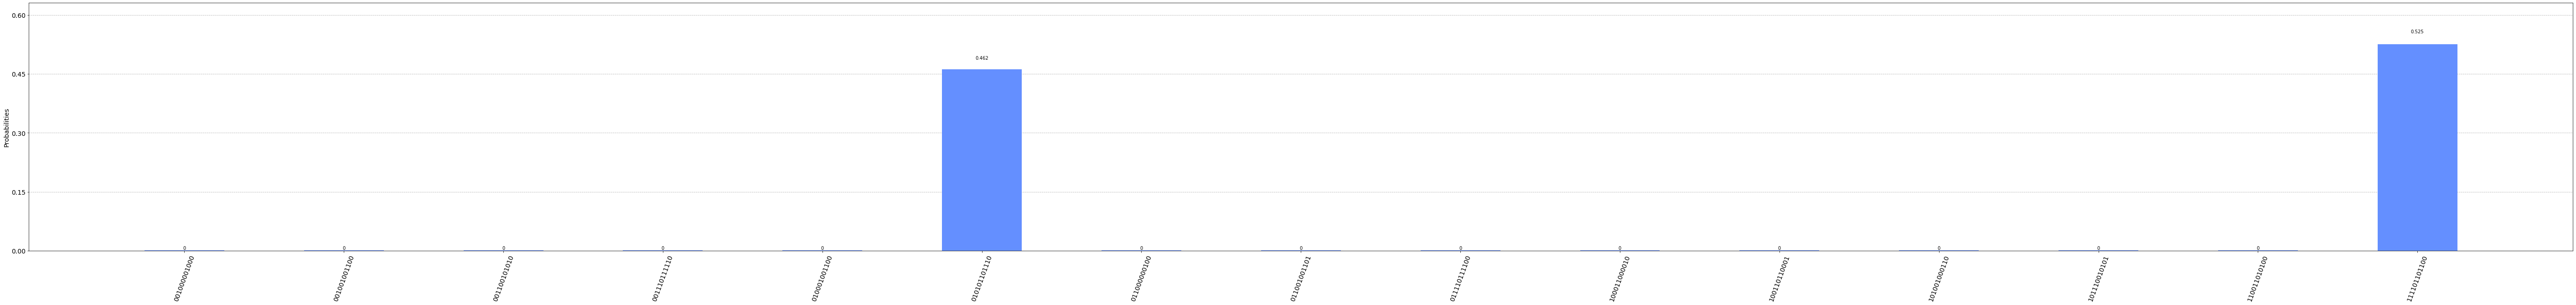

In [9]:
transpiled_qc12 = transpile(qc12, aer_sim)
qobjqc12 = assemble(transpiled_qc12)
resultsqc12 = aer_sim.run(qobjqc12,shots =1024).result()
countsqc12 = resultsqc12.get_counts()
print(countsqc12)
plot_histogram(countsqc12, figsize=(100,10))

Given the following solutions '111101101100', '010101101110', that where already found

In [10]:
qreg121 = QuantumRegister(13)
creg121 = ClassicalRegister(12)

qc121 = QuantumCircuit(qreg121,creg121)
# Initialize qubits in state |s>
qc121.x(12)
qc121.h(range(13))
qc121.barrier()  
test_list = []
for j in range(63):
    test_list.append(j) 
# using random.choice() to
# get a random number
random_num = random.choice(test_list)
print(random_num)
for j in range(random_num):
    qc121.compose(quantum_circuitnc, inplace = True)
    qc121.compose(qc15, inplace = True)

    qc121.barrier()

    qc121.append(diffuser(12), range(12))
    
qc121.barrier() 

qc121.h(12)
#qc.x(range(10))

# Measure the variable qubits
qc121.measure(range(12), range(12))

qc121.draw(fold=-1)


49


┌───┐      ░                                                                                                           ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐         

{'100010000011': 1, '111101101100': 337, '101010001011': 1, '000100111100': 1, '101100000101': 1, '101001011010': 1, '010101101110': 325, '011001011100': 1, '100000000101': 1, '010011101010': 1, '110110010010': 1, '011110010001': 1, '011100110011': 1, '111001010010': 1, '101101100010': 1, '101010010100': 1, '010010010101': 1, '110010101000': 1, '000010000110': 1, '010111011100': 1, '101101100110': 1, '011110011011': 1, '001110011001': 2, '101000110101': 1, '100000000100': 1, '111000000001': 1, '100110011100': 1, '100010001001': 1, '100100110001': 1, '011010011011': 1, '010100110001': 2, '100011000011': 1, '001010000100': 1, '011011001011': 1, '000101101011': 1, '000011101100': 1, '000011000001': 1, '011001111001': 1, '000011010000': 1, '101001111011': 1, '101110001101': 1, '000101011011': 1, '111010000011': 1, '111111000101': 1, '001000100101': 1, '011101000110': 1, '101001001011': 1, '011001101111': 2, '101111111001': 1, '110011011011': 1, '000100011000': 1, '100100010000': 1, '000111

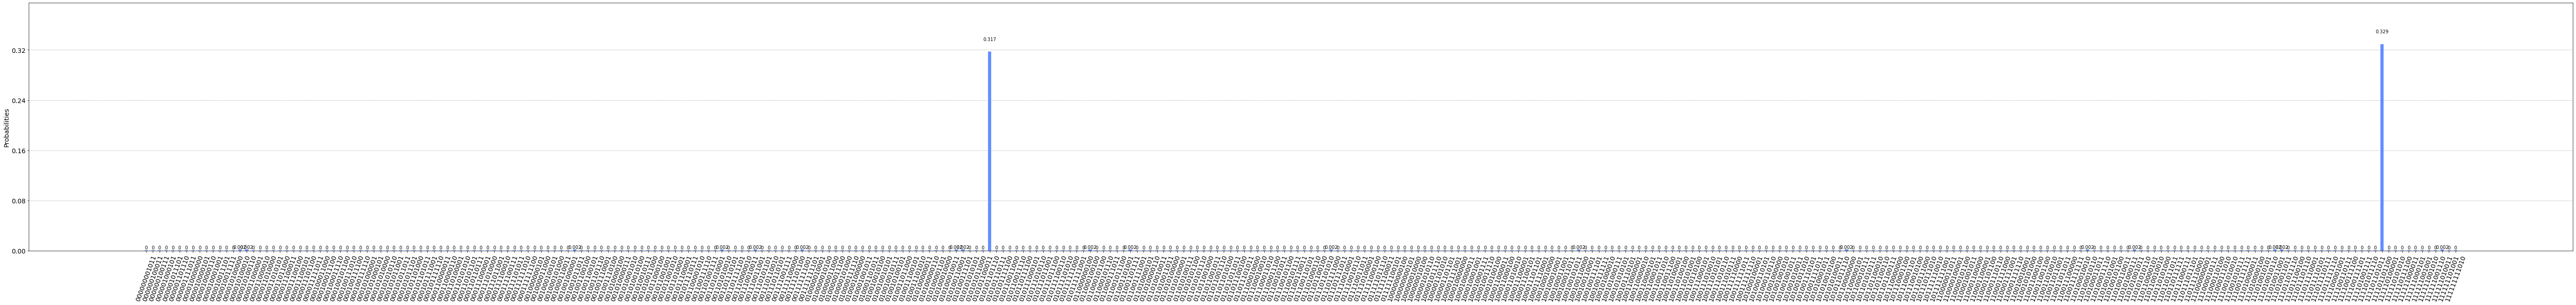

In [11]:
transpiled_qc121 = transpile(qc121, aer_sim)
qobjqc121 = assemble(transpiled_qc121)
resultsqc121 = aer_sim.run(qobjqc121,shots =1024).result()
countsqc121 = resultsqc121.get_counts()
print(countsqc121)
plot_histogram(countsqc121, figsize=(100,10))


Given the same solutions'111101101100', '010101101110' as before

In [12]:
qreg122 = QuantumRegister(13)
creg122 = ClassicalRegister(12)

qc122 = QuantumCircuit(qreg122,creg122)
# Initialize qubits in state |s>
qc122.x(12)
qc122.h(range(13))
qc122.barrier()  
test_list = []
for j in range(63):
    test_list.append(j) 
# using random.choice() to
# get a random number
random_num = random.choice(test_list)
print(random_num)
for j in range(random_num):
    qc122.compose(quantum_circuitnc, inplace = True)
    qc122.compose(qc15, inplace = True)

    qc122.barrier()

    qc122.append(diffuser(12), range(12))
    
qc122.barrier() 

qc122.h(12)
#qc.x(range(10))

# Measure the variable qubits
qc122.measure(range(12), range(12))

qc122.draw(fold=-1)


3


┌───┐      ░                                                                                                           ░ ┌───────┐                                                                                                          ░ ┌───────┐                                                                                                          ░ ┌───────┐ ░      ┌─┐                                 
 q118_0: ┤ H ├──────░───o────■────o────o────o────■────■────■────■────■────■────■────■────o────o────■────■────■────■────o────o───░─┤0      ├──o────■────o────o────o────■────■────■────■────■────■────■────■────o────o────■────■────■────■────o────o───░─┤0      ├──o────■────o────o────o────■────■────■────■────■────■────■────■────o────o────■────■────■────■────o────o───░─┤0      ├─░──────┤M├─────────────────────────────────
         ├───┤      ░   │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │  │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │  │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │ ░      └╥┘┌─┐                              
 q118_1: ┤ H ├──────░───o────o────o────■────■────o────o────o────o────o────o────■────■────o────■────o────■────■────o────■────■───░─┤1      ├──o────o────o────■────■────o────o────o────o────o────o────■────■────o────■────o────■────■────o────■────■───░─┤1      ├──o────o────o────■────■────o────o────o────o────o────o────■────■────o────■────o────■────■────o────■────■───░─┤1      ├─░───────╫─┤M├──────────────────────────────
         ├───┤      ░   │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │  │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │  │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │ ░       ║ └╥┘┌─┐                           
 q118_2: ┤ H ├──────░───■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■───░─┤2      ├──■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■───░─┤2      ├──■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■────■───░─┤2      ├─░───────╫──╫─┤M├───────────────────────────
         ├───┤      ░   │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │  │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │  │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │ ░       ║  ║ └╥┘┌─┐                        
 q118_3: ┤ H ├──────░───■────■────■────■────■────■────■────■────■────■────┼────o────■────■────■────■────o────■────o────■────■───░─┤3      ├──■────■────■────■────■────■────■────■────■────■────┼────o────■────■────■────■────o────■────o────■────■───░─┤3      ├──■────■────■────■────■────■────■────■────■────■────┼────o────■────■────■────■────o────■────o────■────■───░─┤3      ├─░───────╫──╫──╫─┤M├────────────────────────
         ├───┤      ░   │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │  │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │  │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │   ░ │       │ ░       ║  ║  ║ └╥┘┌─┐                     
 q118_4: ┤ H ├──────░───o────■────■────o────o────■────■────■────┼────■────■────■────■────■────o────o────■────■────■────o────o───░─┤4      ├──o────■────■────o────o────■────■────■────┼────■────■────■────■────■────o────o────■────■────■────o────o───░─

{'111000101000': 1, '111100010110': 1, '011111011000': 1, '011000011111': 1, '010110000110': 2, '101111110111': 1, '010011110001': 1, '110111111010': 1, '011101100100': 1, '010011101111': 1, '111000101011': 1, '100100101111': 1, '001000111111': 1, '111000010111': 1, '110011101010': 1, '010011100000': 1, '000011010001': 2, '110110111010': 1, '111101011111': 1, '011000001001': 1, '001110011100': 1, '110000101011': 1, '000111000111': 1, '100001100000': 1, '110010111100': 2, '001111110100': 2, '101011000110': 1, '101010111010': 1, '110101110000': 1, '111100011101': 1, '010101111001': 1, '011111101101': 1, '000101011111': 3, '101010000001': 1, '111101100000': 1, '111010010110': 1, '010011101100': 2, '011101100001': 1, '111001100011': 1, '110101111100': 1, '101001101010': 1, '011100101100': 1, '111011100000': 2, '110001110000': 2, '111010011110': 1, '111101101100': 9, '101100000001': 1, '110000001000': 1, '111010111000': 2, '001010111100': 1, '010000100101': 2, '011110101100': 1, '0001000110

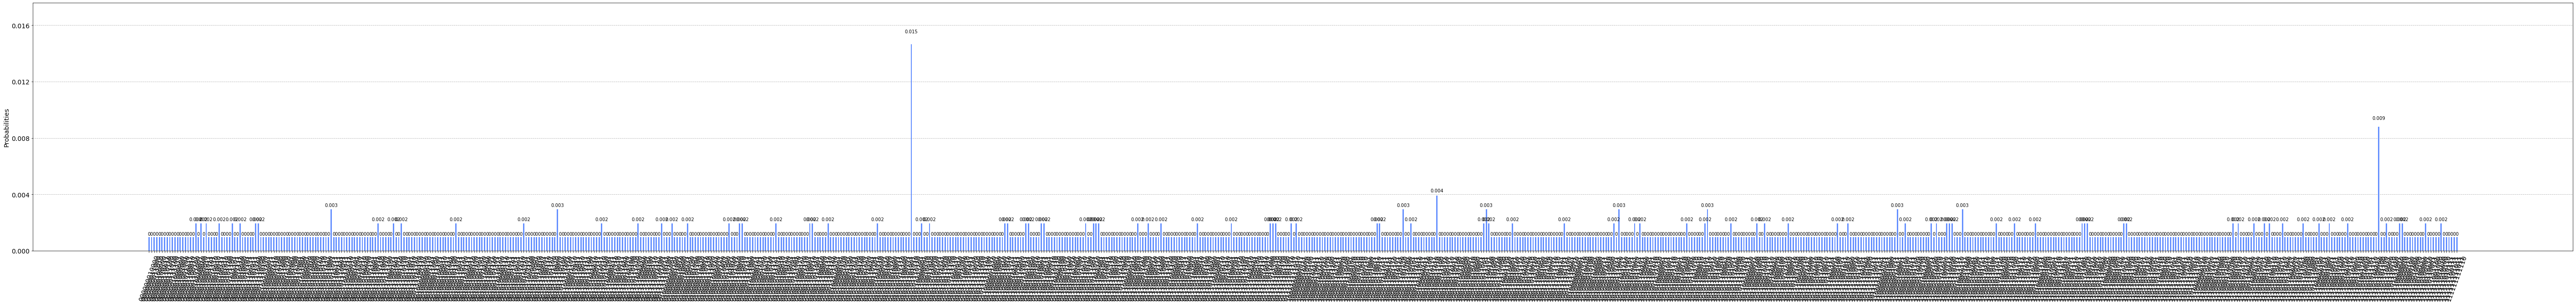

In [13]:
transpiled_qc122 = transpile(qc122, aer_sim)
qobjqc122 = assemble(transpiled_qc122)
resultsqc122 = aer_sim.run(qobjqc122,shots =1024).result()
countsqc122 = resultsqc122.get_counts()
print(countsqc122)
plot_histogram(countsqc122, figsize=(100,10))
